In [1]:

import numpy as np 
import pandas as pd

import re 
import sys 
from pyspark import SparkConf, SparkContext

from pyspark.sql import SQLContext
from scipy.spatial import distance
from pyspark.sql import Row
import matplotlib.pyplot as plt

In [2]:
conf = SparkConf()
sc =SparkContext(conf=conf)    

In [3]:
dimensions = 58
iterations = 20
iteration_2 = 40
clusters = 10
k=20
lam = 0.1 
eta = 0.1
data_path = "ratings.csv"
c1 = np.loadtxt("c1.txt")
c2  = np.loadtxt("c2.txt")
data = sc.textFile("data.txt")
data1 = np.loadtxt("data.txt")

data2 = sc.parallelize(data1)
c1_new = sc.parallelize(c1)
c2_new = sc.parallelize(c2)

c1_new = c1_new.collect()
c2_new = c2_new.collect()


In [4]:
distanc = False

if distanc:
    dist = data.map(lambda v: (v,np.array([distance.euclidean(v,c)])))
    print(" inside if")                                
else:
    dist = data.map(lambda v: (v,np.array([distance.cityblock(v,c)])))
    print("inside else")

inside else


In [7]:
def kmeans(data,centroids, iterations, euclidean_distance):
    #dist = euclidean  if diatance else manhattan
    costlist = []
    for j in range(20):
        print(j)
        dist = data.map(lambda v: (v,np.array([distance.euclidean(v,c) for c in centroids]))) if euclidean_distance else data.map(lambda v: (v,np.array([distance.cityblock(v,c)for c in centroids])))
    
        minval  = dist.map(lambda x: np.min(x[1]))
        minval_index = dist.map(lambda x: np.argmin(x[1]))
        rdd_error = minval.sum()
        
        costlist.append(rdd_error)
        print(costlist)
        
        tup = dist.map(lambda y: (np.argmin(y[1]),y[0]))
        tup1=tup.reduceByKey(lambda x, y : x+y)
        tupOne = dist.map(lambda y: (np.argmin(y[1]), 1))
        tupOne1=tupOne.reduceByKey(lambda x, y : x+y)
        tup2 = tup1.join(tupOne1)
        #print(tup2.collect())
        #tup2 = tup1.mapValues(lambda s : sum(s)/len(s)).collect()
        tup3 = tup2.map(lambda x : (x[1][0]/x[1][1]))
        centroids =tup3.collect()
        
    return costlist 

In [8]:
cost1 = kmeans(data2,c1_new,20,True)

0
[395749.84683885664]
1
[395749.84683885664, 318949.51256780355]
2
[395749.84683885664, 318949.51256780355, 316897.80884241103]
3
[395749.84683885664, 318949.51256780355, 316897.80884241103, 327978.22081631736]
4
[395749.84683885664, 318949.51256780355, 316897.80884241103, 327978.22081631736, 333528.07760380046]
5
[395749.84683885664, 318949.51256780355, 316897.80884241103, 327978.22081631736, 333528.07760380046, 334334.4194322734]
6
[395749.84683885664, 318949.51256780355, 316897.80884241103, 327978.22081631736, 333528.07760380046, 334334.4194322734, 334093.9076522837]
7
[395749.84683885664, 318949.51256780355, 316897.80884241103, 327978.22081631736, 333528.07760380046, 334334.4194322734, 334093.9076522837, 333273.43541849416]
8
[395749.84683885664, 318949.51256780355, 316897.80884241103, 327978.22081631736, 333528.07760380046, 334334.4194322734, 334093.9076522837, 333273.43541849416, 331554.1795463423]
9
[395749.84683885664, 318949.51256780355, 316897.80884241103, 327978.22081631736

In [13]:
cost2 = kmeans(data2,c2_new,20,True)

0
[1150355.543605972]
1
[1150355.543605972, 825718.3762248197]
2
[1150355.543605972, 825718.3762248197, 708799.388431449]
3
[1150355.543605972, 825718.3762248197, 708799.388431449, 657164.9986229449]
4
[1150355.543605972, 825718.3762248197, 708799.388431449, 657164.9986229449, 625836.6031138015]
5
[1150355.543605972, 825718.3762248197, 708799.388431449, 657164.9986229449, 625836.6031138015, 607124.6582411078]
6
[1150355.543605972, 825718.3762248197, 708799.388431449, 657164.9986229449, 625836.6031138015, 607124.6582411078, 589221.9855435155]
7
[1150355.543605972, 825718.3762248197, 708799.388431449, 657164.9986229449, 625836.6031138015, 607124.6582411078, 589221.9855435155, 568010.6081473066]
8
[1150355.543605972, 825718.3762248197, 708799.388431449, 657164.9986229449, 625836.6031138015, 607124.6582411078, 589221.9855435155, 568010.6081473066, 539364.6387591537]
9
[1150355.543605972, 825718.3762248197, 708799.388431449, 657164.9986229449, 625836.6031138015, 607124.6582411078, 589221.98

In [9]:
cost3 = kmeans(data2,c1_new,20,False)

0
[550117.1419999998]
1
[550117.1419999998, 464829.2684039447]
2
[550117.1419999998, 464829.2684039447, 470934.15384668077]
3
[550117.1419999998, 464829.2684039447, 470934.15384668077, 483874.8162850932]
4
[550117.1419999998, 464829.2684039447, 470934.15384668077, 483874.8162850932, 489234.2347883456]
5
[550117.1419999998, 464829.2684039447, 470934.15384668077, 483874.8162850932, 489234.2347883456, 487664.6926267896]
6
[550117.1419999998, 464829.2684039447, 470934.15384668077, 483874.8162850932, 489234.2347883456, 487664.6926267896, 483718.66592851386]
7
[550117.1419999998, 464829.2684039447, 470934.15384668077, 483874.8162850932, 489234.2347883456, 487664.6926267896, 483718.66592851386, 475337.9476330567]
8
[550117.1419999998, 464829.2684039447, 470934.15384668077, 483874.8162850932, 489234.2347883456, 487664.6926267896, 483718.66592851386, 475337.9476330567, 474871.9665496556]
9
[550117.1419999998, 464829.2684039447, 470934.15384668077, 483874.8162850932, 489234.2347883456, 487664.69

In [15]:
cost4 = kmeans(data2,c2_new,20,False)

0
[1433739.3100000008]
1
[1433739.3100000008, 1084488.7769648791]
2
[1433739.3100000008, 1084488.7769648791, 973431.7146620427]
3
[1433739.3100000008, 1084488.7769648791, 973431.7146620427, 895934.5925630713]
4
[1433739.3100000008, 1084488.7769648791, 973431.7146620427, 895934.5925630713, 865128.3352940818]
5
[1433739.3100000008, 1084488.7769648791, 973431.7146620427, 895934.5925630713, 865128.3352940818, 845846.6470313491]
6
[1433739.3100000008, 1084488.7769648791, 973431.7146620427, 895934.5925630713, 865128.3352940818, 845846.6470313491, 827219.5827561255]
7
[1433739.3100000008, 1084488.7769648791, 973431.7146620427, 895934.5925630713, 865128.3352940818, 845846.6470313491, 827219.5827561255, 803590.3456011104]
8
[1433739.3100000008, 1084488.7769648791, 973431.7146620427, 895934.5925630713, 865128.3352940818, 845846.6470313491, 827219.5827561255, 803590.3456011104, 756039.5172761203]
9
[1433739.3100000008, 1084488.7769648791, 973431.7146620427, 895934.5925630713, 865128.3352940818, 8

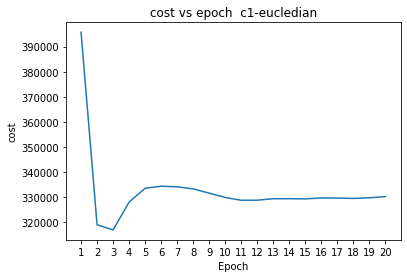

In [11]:

epochs= ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
plt.plot(epochs ,cost1)

plt.title('cost vs epoch  c1-eucledian')
plt.ylabel('cost')
plt.xlabel('Epoch')

plt.show()

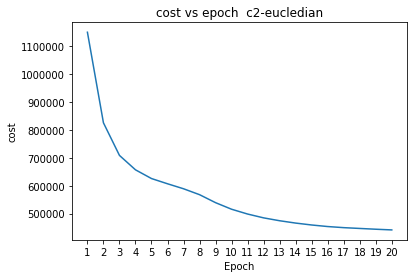

In [14]:
epochs= ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
plt.plot(epochs ,cost2)

plt.title('cost vs epoch  c2-eucledian')
plt.ylabel('cost')
plt.xlabel('Epoch')

plt.show()

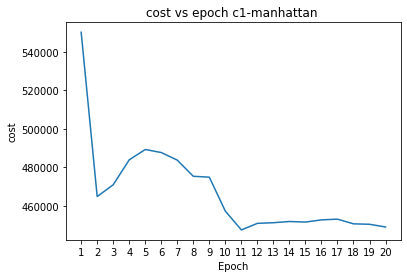

In [12]:
epochs= ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
plt.plot(epochs ,cost3)

plt.title('cost vs epoch c1-manhattan ')
plt.ylabel('cost')
plt.xlabel('Epoch')

plt.show()

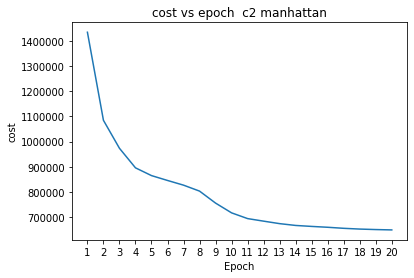

In [16]:
epochs= ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
plt.plot(epochs ,cost4)

plt.title('cost vs epoch  c2 manhattan')
plt.ylabel('cost')
plt.xlabel('Epoch')

plt.show()